<a href="https://colab.research.google.com/github/ahmadfahriramadhani/Pengolahan-Citra-Digital-F-/blob/main/frequency_domain(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

Resolusi gambar 1: 220x386 piksel


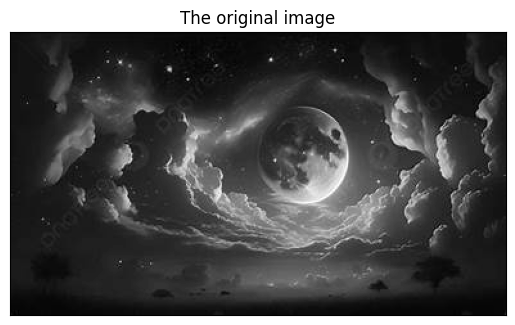

In [19]:
urllib.request.urlretrieve(
'https://tse1.mm.bing.net/th?id=OIP.N6gaby63gxS90yGZGeNAmAAAAA&pid=Api&P=0&h=220', # link from google image
"gambar_1.png")

# load image
image_1 = cv2.imread('gambar_1.png',cv2.IMREAD_GRAYSCALE) # cv2.IMREAD_GRAYSCALE


# Dapatkan resolusi gambar dalam piksel
width, height, = image_1.shape
print(f"Resolusi gambar 1: {width}x{height} piksel")

plt.title('The original image')
plt.imshow(image_1, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()


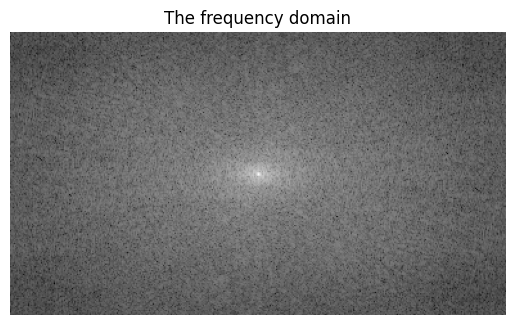

In [20]:
# transform into frequency domain
F = np.fft.fftshift(np.fft.fft2(image_1))

plt.figure(dpi=100)
plt.title('The frequency domain')
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

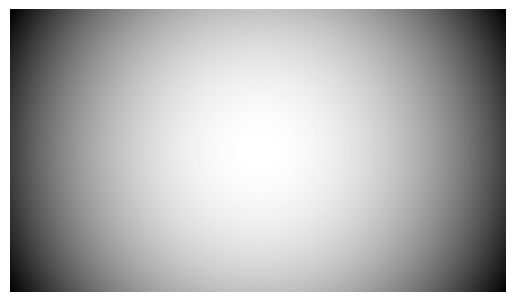

In [21]:
# Laplacian Filter
P,Q = image_1.shape
H = np.zeros((P,Q), dtype=np.float32)
for u in range(P):
    for v in range(Q):
        H[u,v] = -4*np.pi*np.pi*((u-P/2)**2 + (v-Q/2)**2)

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

In [22]:
# Laplacian image
Lap = H * F
Lap = np.fft.ifftshift(Lap)
Lap = np.real(np.fft.ifft2(Lap))

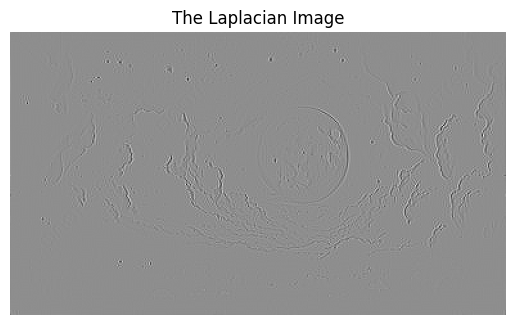

In [23]:
# convert the Laplacian Image value into range [-1,1]
OldRange = np.max(Lap) - np.min(Lap)
NewRange = 1 - -1
LapScaled = (((Lap - np.min(Lap)) * NewRange) / OldRange) + -1

plt.figure(dpi=100)
plt.title('The Laplacian Image')
plt.imshow(LapScaled, cmap='gray')
plt.axis('off')
plt.show()

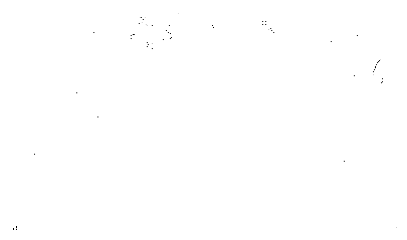

In [24]:
# image ehancement
c = -1
g = image_1 + c*LapScaled
g = np.clip(g, 0, 1)

plt.figure(figsize=(5,7),dpi=100)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()